In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
def primeFactors(n):
    factors = []
    
    # Handle 2's
    while n % 2 == 0:
        factors.append(2)
        n = n // 2
    
    # Handle odd numbers
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            factors.append(i)
            n = n // i
    
    # If n is still > 2, it's prime
    if n > 2:
        factors.append(n)
    
    return factors

# Create all the data first
data = {i: [primeFactors(i)] for i in range(1, 10001)}

# Create DataFrame all at once
df = pd.DataFrame(data, index=[0])

# Example usage:
print("First 10 columns:")
print(df.iloc[:, :10])

First 10 columns:
   1    2    3       4    5       6    7          8       9       10
0  []  [2]  [3]  [2, 2]  [5]  [2, 3]  [7]  [2, 2, 2]  [3, 3]  [2, 5]


In [ ]:
def count_prime_factors(max_num=1000):
    def get_prime_factors(n):
        factors = []
        
        # Handle 2's
        while n % 2 == 0:
            factors.append(2)
            n = n // 2
        
        # Handle odd numbers
        for i in range(3, int(math.sqrt(n)) + 1, 2):
            while n % i == 0:
                factors.append(i)
                n = n // i
        
        # If n is still > 2, it's prime
        if n > 2:
            factors.append(n)
            
        return factors
    
    # Create both dictionaries
    total_factors = {}
    unique_factors = {}
    
    for i in range(1, max_num + 1):
        factors = get_prime_factors(i)
        total_factors[i] = len(factors)
        unique_factors[i] = len(set(factors))
    
    return total_factors, unique_factors

# Get both dictionaries
total_count, unique_count = count_prime_factors(max_num=1000000)

Number: (Total factors, Unique factors)
1: (0, 0)
2: (1, 1)
4: (2, 1)
8: (3, 1)
12: (3, 2)
16: (4, 1)
100: (4, 2)
997: (1, 1)


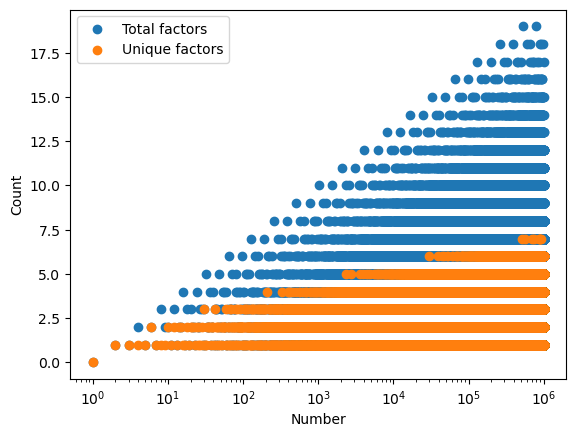

In [27]:
# plot the number of total factors and unique factors for each number
plt.scatter(total_count.keys(), total_count.values(), label="Total factors")
plt.scatter(unique_count.keys(), unique_count.values(), label="Unique factors")
plt.xscale("log")
plt.xlabel("Number")
plt.ylabel("Count")
plt.legend()
plt.show()

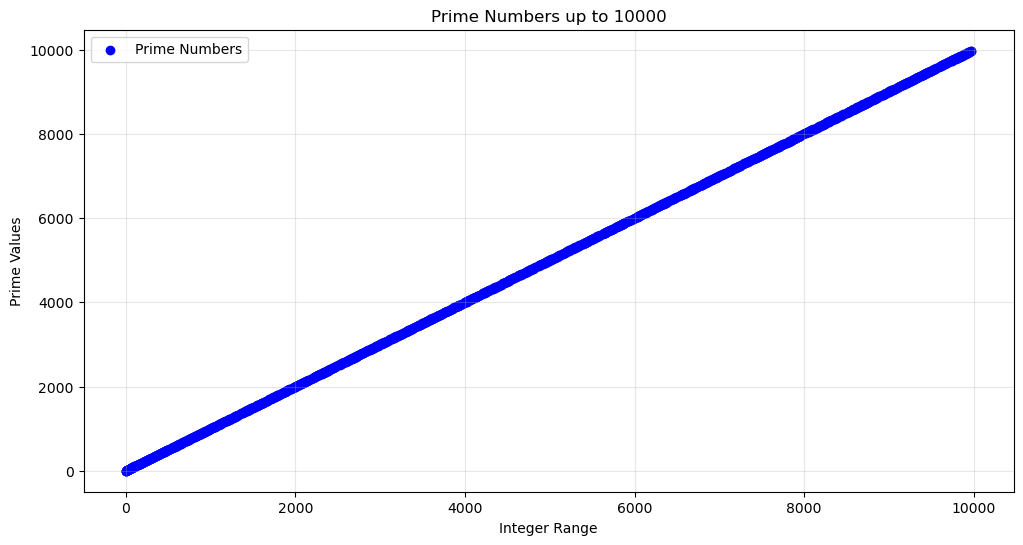


Prime numbers found:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193

In [29]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def generate_primes_df_and_plot(limit):
    # Create a DataFrame with all numbers up to limit
    df = pd.DataFrame(index=range(1, limit + 1))
    df['number'] = df.index
    df['is_prime'] = df['number'].apply(is_prime)
    df['prime_value'] = df.apply(lambda row: row['number'] if row['is_prime'] else np.nan, axis=1)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['number'], df['prime_value'], 
               marker='o', 
               color='blue',
               label='Prime Numbers')
    plt.xlabel('Integer Range')
    plt.ylabel('Prime Values')
    plt.title(f'Prime Numbers up to {limit}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    return df

# Generate and plot primes up to 100
df = generate_primes_df_and_plot(10000)

# Display the prime numbers found
print("\nPrime numbers found:")
print(df[df['is_prime']]['number'].tolist())